In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


# Problem Description:
This report investigates the potential of various models, including unsupervised learning approaches, 
to predict diabetes. By focusing on specific features, 
I aim to determine the effectiveness of these models in distinguishing between diabetic and non-diabetic individuals.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import NMF

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Exploratory Data Analysis (EDA)
The Exploratory Data Analysis (EDA) was conducted using a dataset containing multiple health-related features. Key steps included:

Distribution analysis of categorical variables like gender, smoking history, hypertension, and heart disease.
Examination of continuous variables such as age, BMI, HbA1c level, and blood glucose level through histograms and box plots.
Investigation of the relationship between these features and diabetes status, utilizing scatter plots and count plots for a comprehensive overview.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


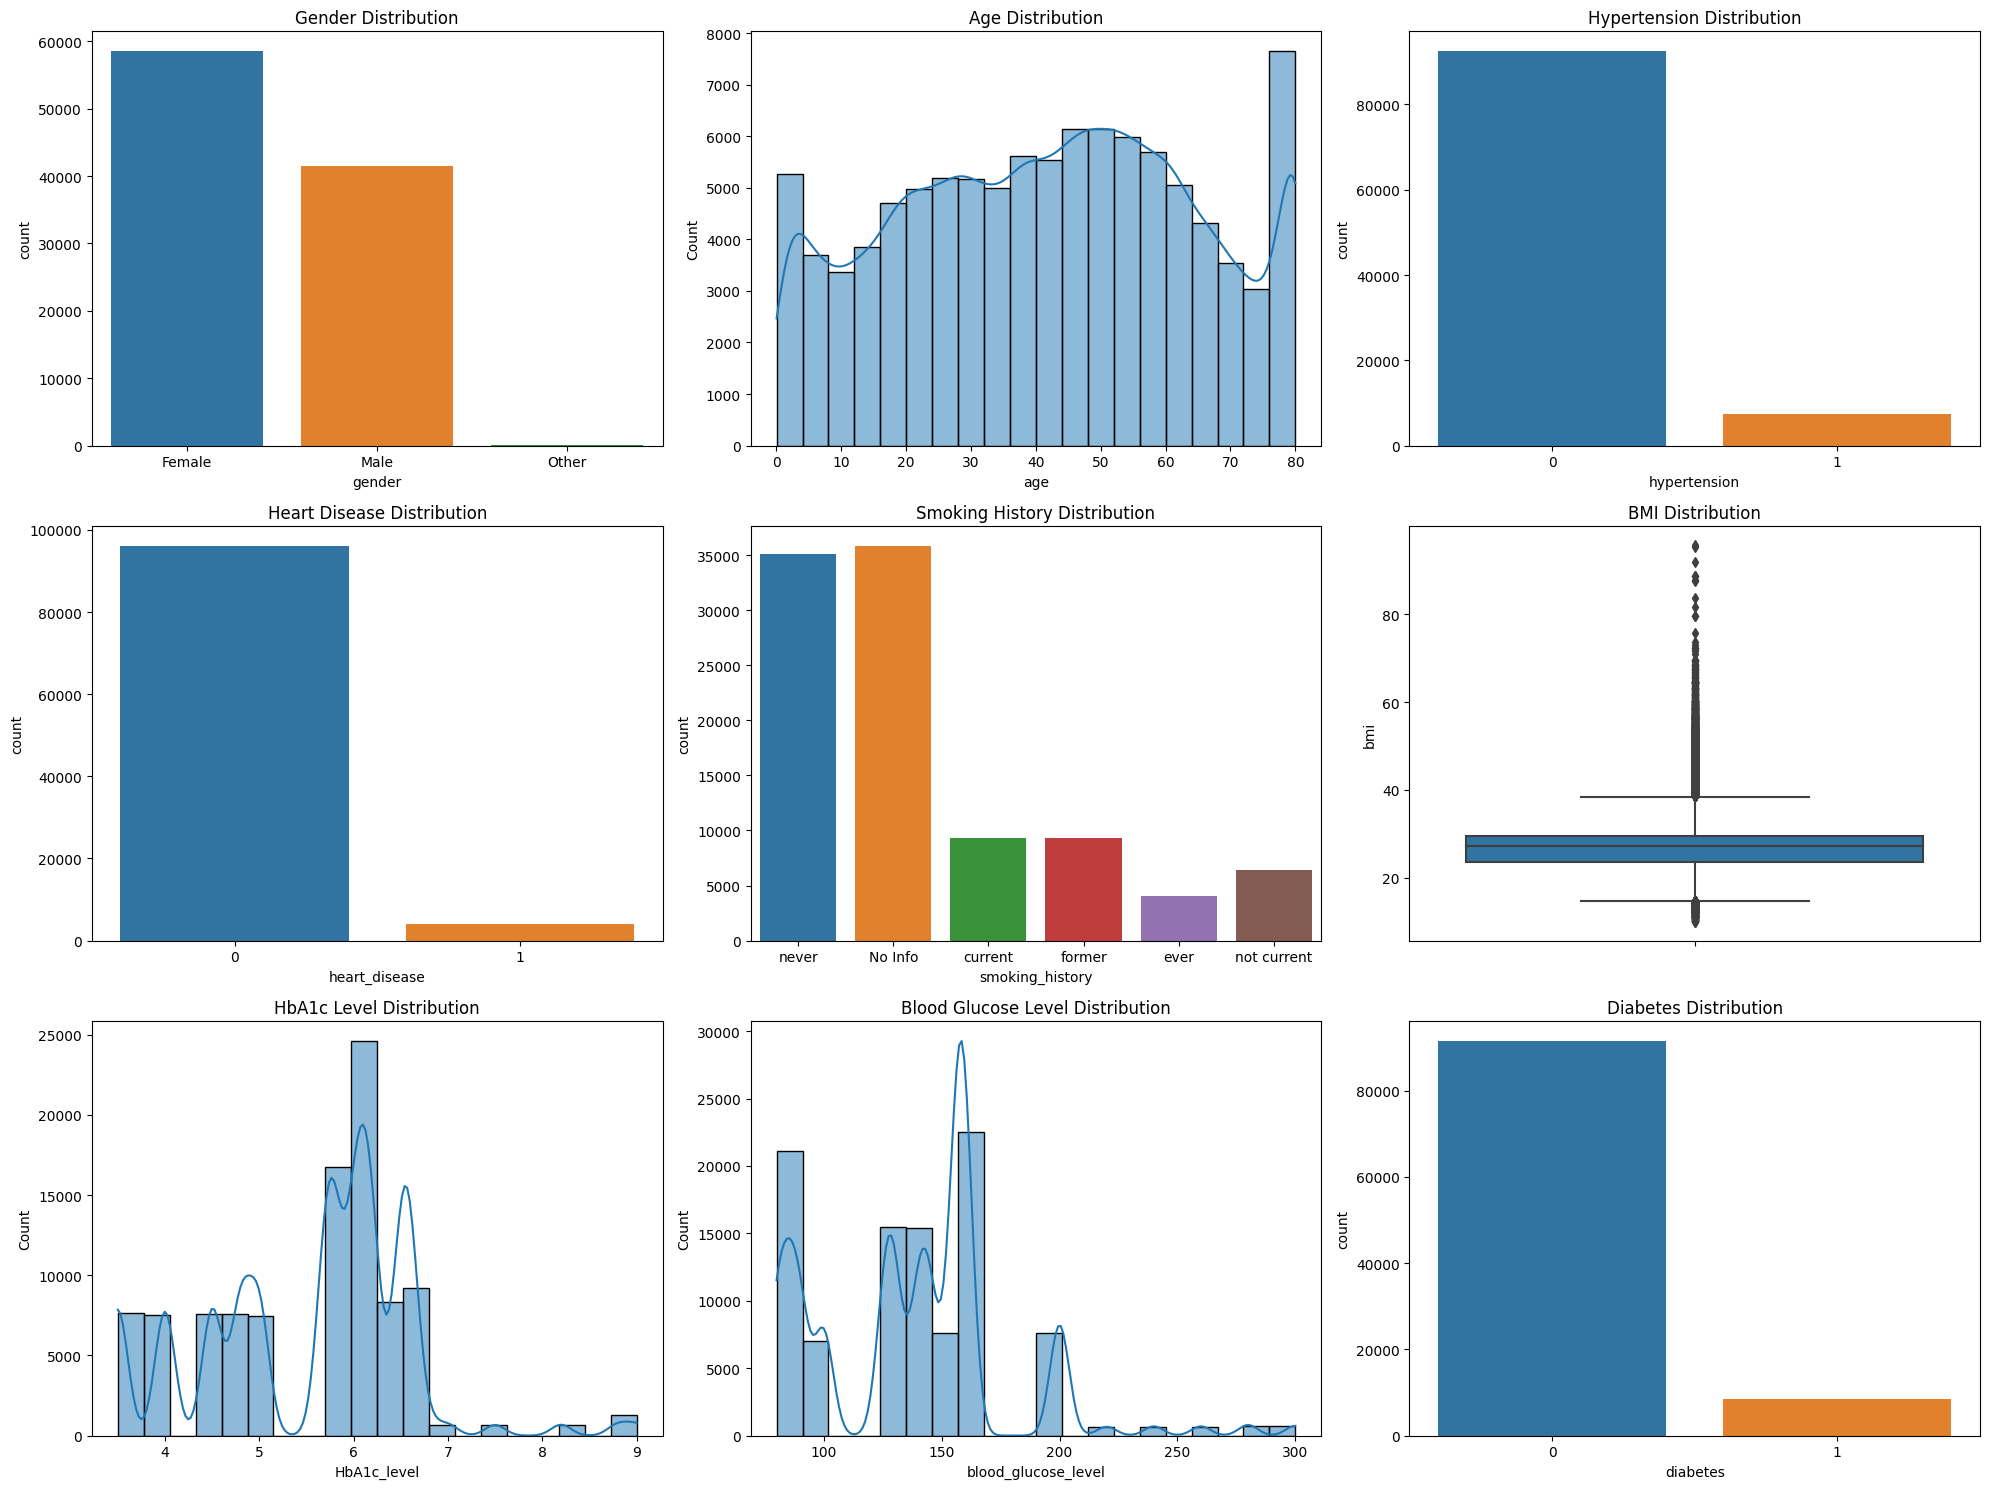

In [4]:
# Setting up the plots
plt.figure(figsize=(20, 15))

# Bar plot for gender distribution
plt.subplot(3, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

# Histogram for age distribution
plt.subplot(3, 3, 2)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

# Bar plot for hypertension distribution
plt.subplot(3, 3, 3)
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')

# Bar plot for heart disease distribution
plt.subplot(3, 3, 4)
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')

# Bar plot for smoking history distribution
plt.subplot(3, 3, 5)
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')

# Box plot for BMI distribution
plt.subplot(3, 3, 6)
sns.boxplot(y='bmi', data=df)
plt.title('BMI Distribution')

# Histogram for HbA1c level distribution
plt.subplot(3, 3, 7)
sns.histplot(df['HbA1c_level'], bins=20, kde=True)
plt.title('HbA1c Level Distribution')

# Histogram for blood glucose level distribution
plt.subplot(3, 3, 8)
sns.histplot(df['blood_glucose_level'], bins=20, kde=True)
plt.title('Blood Glucose Level Distribution')

# Bar plot for diabetes distribution
plt.subplot(3, 3, 9)
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')

plt.tight_layout()
plt.show()


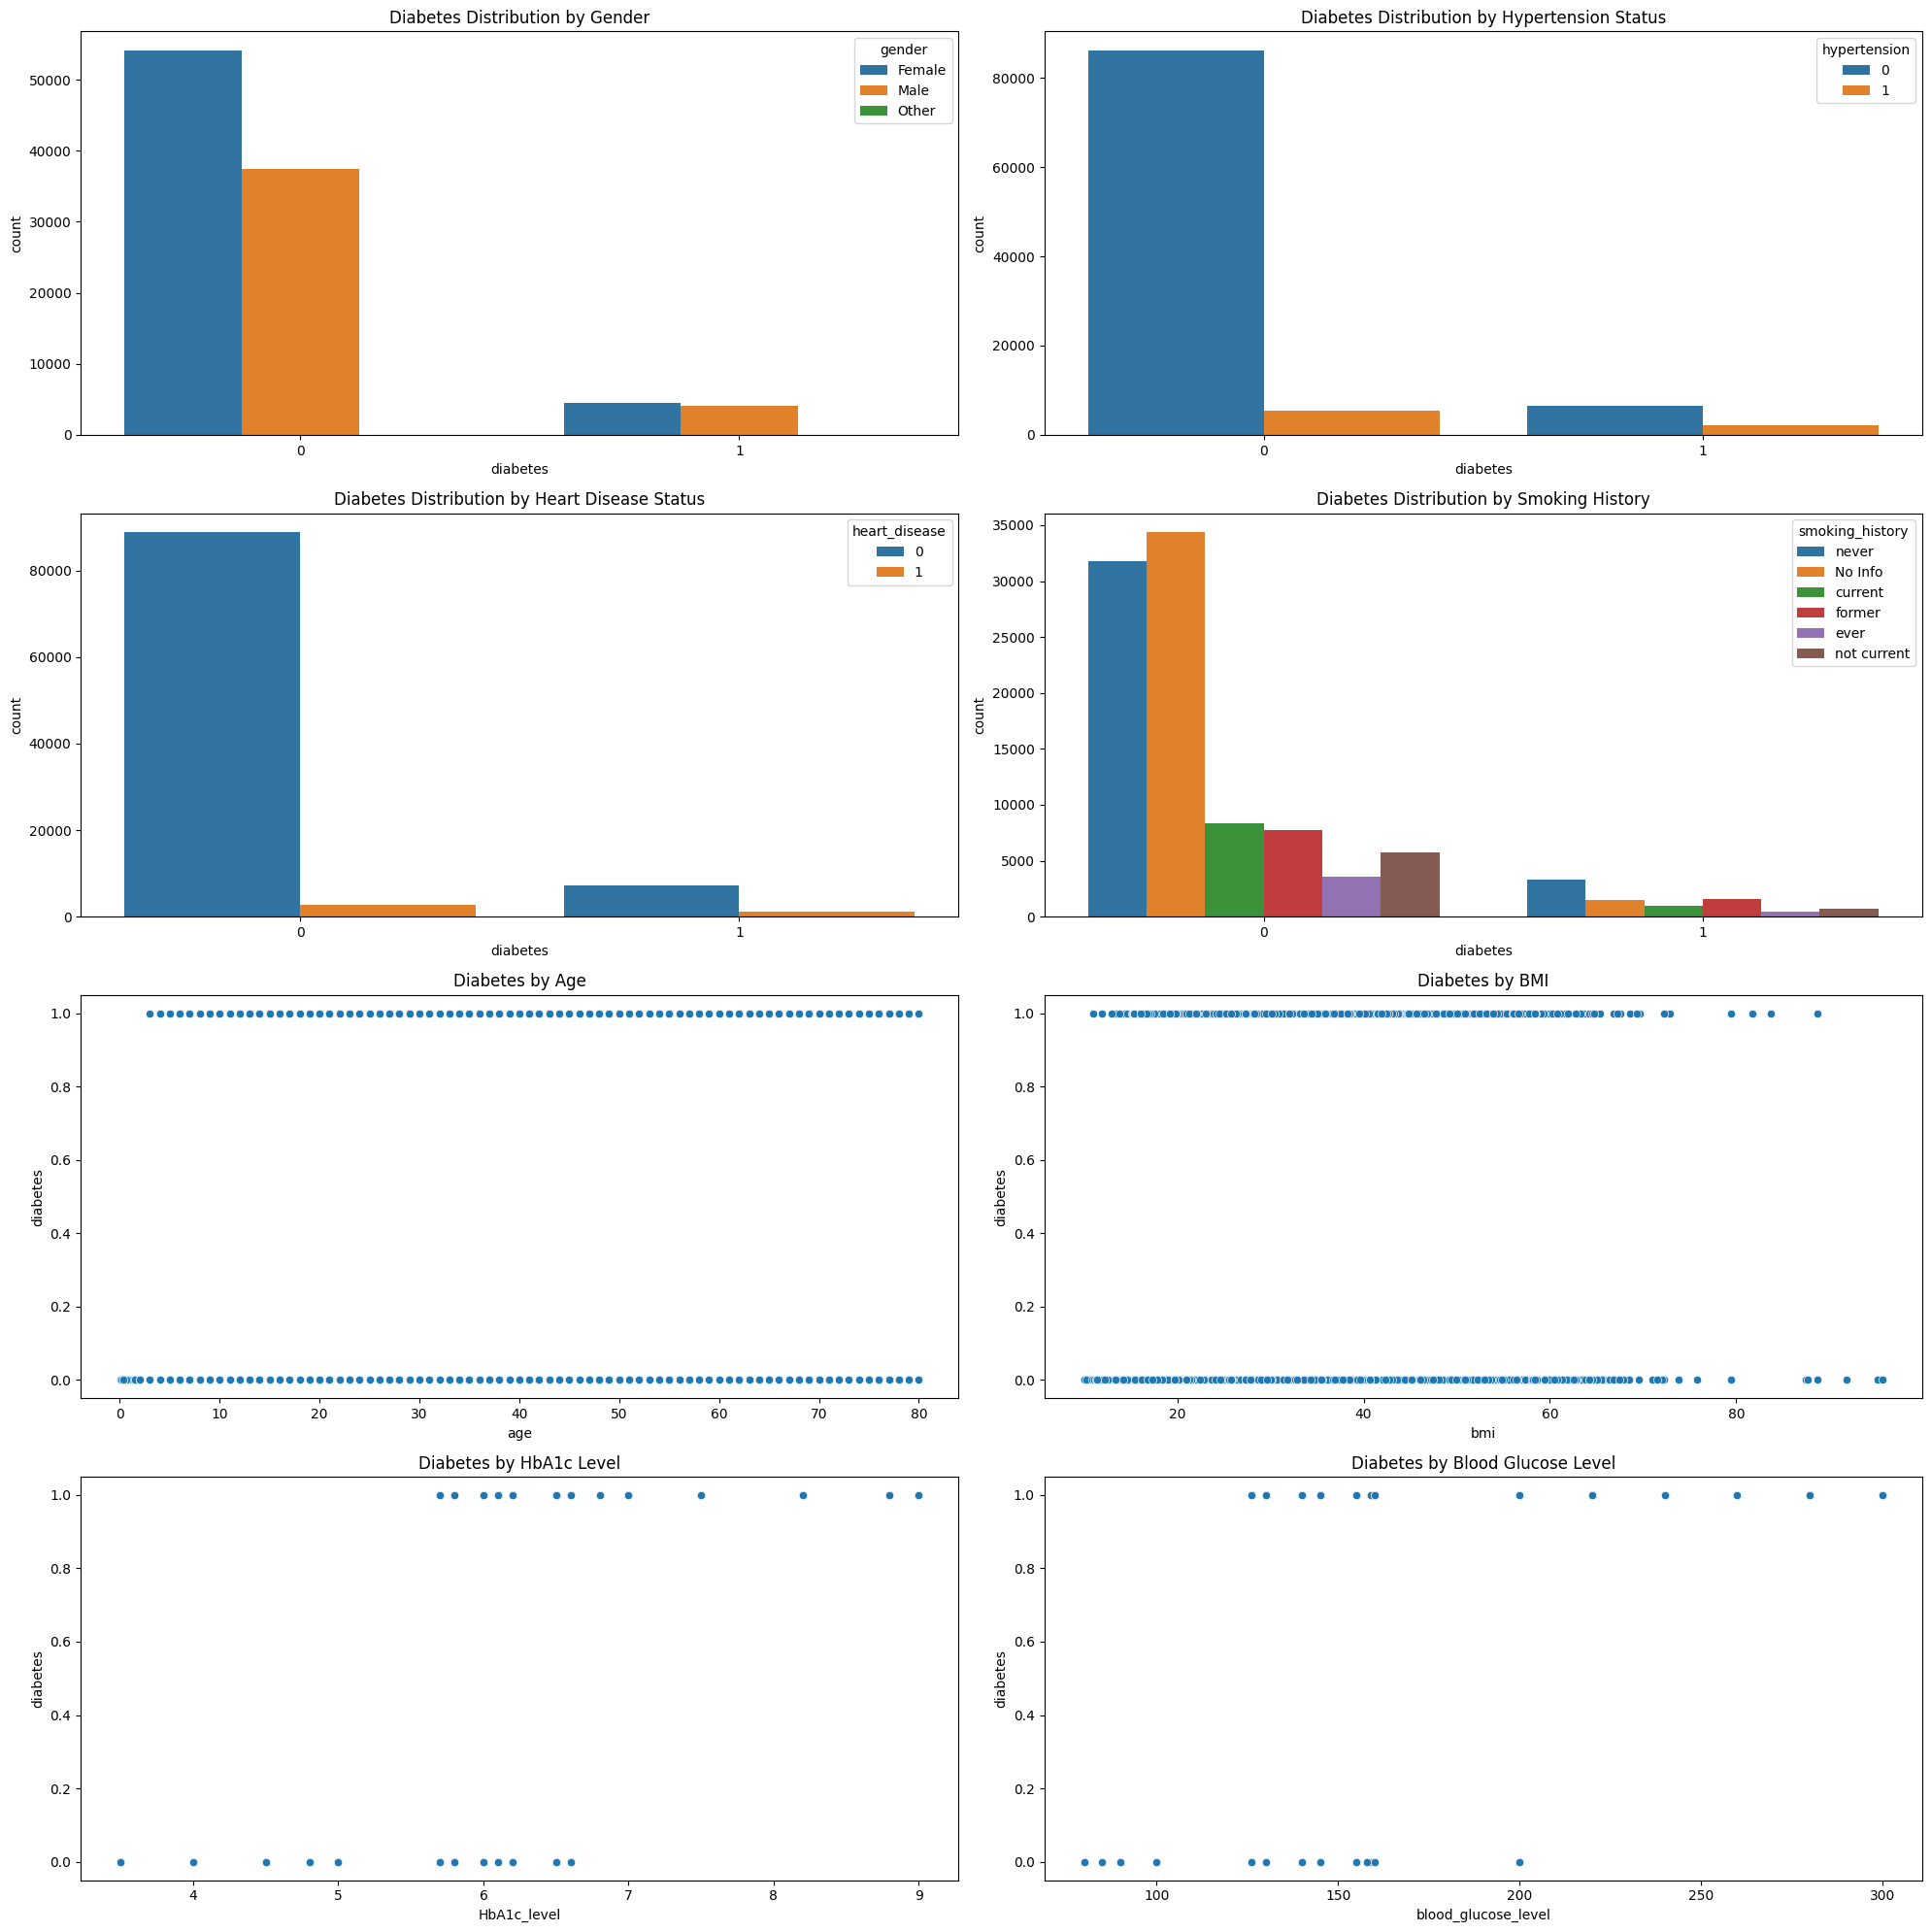

In [5]:
plt.figure(figsize=(20, 20))

# gender vs diabetes
plt.subplot(4, 2, 1)
sns.countplot(x='diabetes', hue='gender', data=df)
plt.title('Diabetes Distribution by Gender')

# hypertension vs diabetes
plt.subplot(4, 2, 2)
sns.countplot(x='diabetes', hue='hypertension', data=df)
plt.title('Diabetes Distribution by Hypertension Status')

# heart_disease vs diabetes
plt.subplot(4, 2, 3)
sns.countplot(x='diabetes', hue='heart_disease', data=df)
plt.title('Diabetes Distribution by Heart Disease Status')

# smoking_history vs diabetes
plt.subplot(4, 2, 4)
sns.countplot(x='diabetes', hue='smoking_history', data=df)
plt.title('Diabetes Distribution by Smoking History')

# Continuous variables plotted with scatter plots showing relation to diabetes
# Note: Here I adjust the code to meet the requirement of using diabetes as Y-axis, which is unusual for scatter plots.

# age vs diabetes
plt.subplot(4, 2, 5)
sns.scatterplot(y='diabetes', x='age', data=df)
plt.title('Diabetes by Age')

# bmi vs diabetes
plt.subplot(4, 2, 6)
sns.scatterplot(y='diabetes', x='bmi', data=df)
plt.title('Diabetes by BMI')

# HbA1c_level vs diabetes
plt.subplot(4, 2, 7)
sns.scatterplot(y='diabetes', x='HbA1c_level', data=df)
plt.title('Diabetes by HbA1c Level')

# blood_glucose_level vs diabetes
plt.subplot(4, 2, 8)
sns.scatterplot(y='diabetes', x='blood_glucose_level', data=df)
plt.title('Diabetes by Blood Glucose Level')

plt.tight_layout()
plt.show()


# Unspervised Learning Method： K-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
X = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data set 
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# K-Means clustering modeling
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict with test data
test_cluster_labels = kmeans.predict(X_test)

# Performance evaluation
silhouette_avg = silhouette_score(X_test, test_cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2165


# Hyperparameter tuning

# 1. Evaluate the optimal number of clusters for K-Means clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

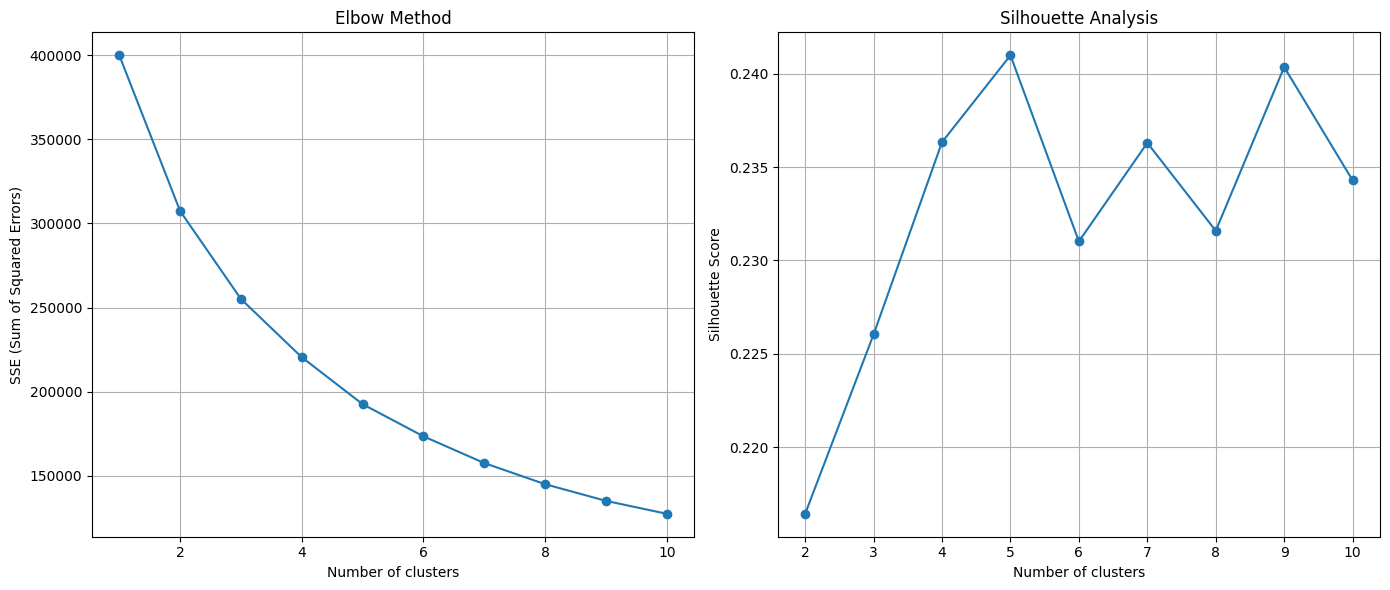

Silhouette Scores: [0.21642660845036957, 0.22603711212184158, 0.23633644376099475, 0.24099378010831501, 0.23101972733089454, 0.23630162253183484, 0.23158972701449834, 0.2403615780843738, 0.2342908621729812]


In [7]:
# Evaluate the optimal number of clusters using the Elbow Method
sse = []  # Sum of squared errors for each k
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the model
    sse.append(kmeans.inertia_)  # Append the sum of squared errors

# Plotting the Elbow Method results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # First subplot for the Elbow Method
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.grid(True)

# Evaluate the optimal number of clusters using Silhouette Analysis
silhouette_scores = []  # To store silhouette scores for each k
for k in range(2, 11):  # Silhouette score isn't defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the model
    score = silhouette_score(X_scaled, kmeans.labels_)  # Calculate silhouette score
    silhouette_scores.append(score)  # Append the score

plt.subplot(1, 2, 2)  # Second subplot for Silhouette Analysis
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

# Optionally, print silhouette scores for further inspection
print("Silhouette Scores:", silhouette_scores)


# 2. Apply PCA for dimensionality reduction

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.3326


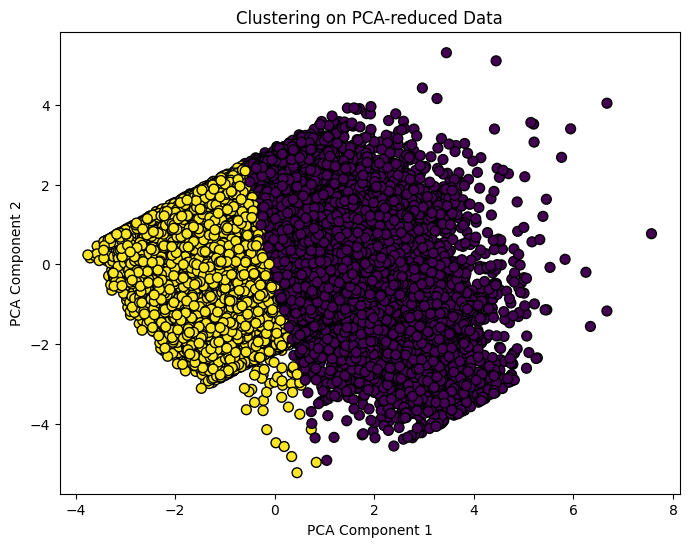

In [8]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Use K-Means clustering on the reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering on PCA-reduced Data')
plt.show()


# 3. Apply K-Means clustering using k-means++ initialization

In [9]:
# Apply K-Means clustering using k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score with k-means++: {silhouette_avg:.4f}')


Silhouette Score with k-means++: 0.2260


# Select Feature with PCA

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 0 ... 0 0 0]
Silhouette Score after PCA: 0.7865


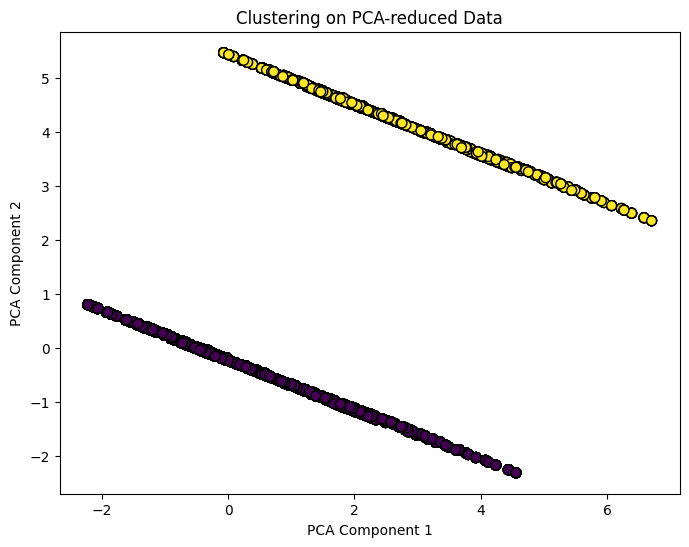

In [14]:
# Select only 'HbA1c_level' and 'blood_glucose_level' features
selected_features = ['heart_disease','HbA1c_level', 'blood_glucose_level']
X = df[selected_features].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Use K-Means clustering on the reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Predict cluster labels
labels = kmeans.labels_
print(labels)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering on PCA-reduced Data')
plt.show()



selected_features = 
* ['HbA1c_level', 'blood_glucose_level']　: Silhouette Score after PCA: 0.4010
* ['age','HbA1c_level', 'blood_glucose_level'] : Silhouette Score after PCA: 0.3429
* ['hypertension','HbA1c_level', 'blood_glucose_level'] : Silhouette Score after PCA: 0.7225
* ['heart_disease','HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.7865
* ['bmi','HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.3307
*  ['hypertension','heart_disease','HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.6710
* ['gender','heart_disease', 'HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.4608
* ['smoking_history', 'HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.4645
* ['gender', 'HbA1c_level', 'blood_glucose_level']: Silhouette Score after PCA: 0.5376


# Comparison chart

In [15]:
def plot_comparison_matrix(df, selected_features):
    """
    Plots a comparison matrix for clustering results vs actual diabetes status.

    Parameters:
    - df: DataFrame containing the dataset.
    - selected_features: List of features to be selected for the analysis.
    """
    # Select the specified features
    X = df[selected_features].values

    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_pca = pca.fit_transform(X_scaled)

    # Use K-Means clustering on the reduced data
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_pca)

    # Predict cluster labels
    labels = kmeans.labels_

    # Evaluate clustering performance using silhouette score
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

    # Actual diabetes status
    diabetes_status = df['diabetes'].values

    # Create a confusion matrix-like 2x2 matrix to compare clustering results with actual diabetes status
    comparison_matrix = np.zeros((2, 2))

    for i in range(len(labels)):
        comparison_matrix[labels[i], diabetes_status[i]] += 1

    # Plot the 2x2 heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(comparison_matrix, annot=True, fmt=".0f", cmap='viridis', cbar=True, square=True)
    plt.title('Comparison of Clustering vs. Actual Diabetes Status')
    plt.xlabel('Actual Diabetes Status (0: Non-diabetic, 1: Diabetic)')
    plt.ylabel('Cluster Label (0 or 1)')
    plt.show()



# Select only 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level' features

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.3786


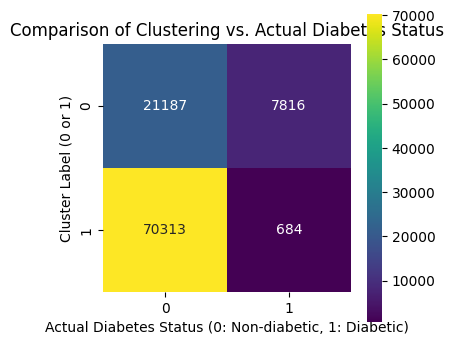

In [17]:
# Call the function with the desired features
selected_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)


# Select only 'heart_disease', 'HbA1c_level' and 'blood_glucose_level' features

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.7865


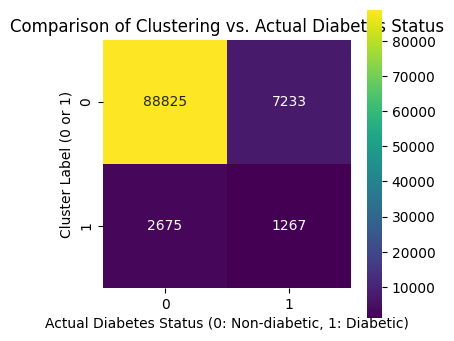

In [18]:
# Select only 'heart_disease', 'HbA1c_level' and 'blood_glucose_level' features
# Call the function with the desired features
selected_features = ['heart_disease', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.7225


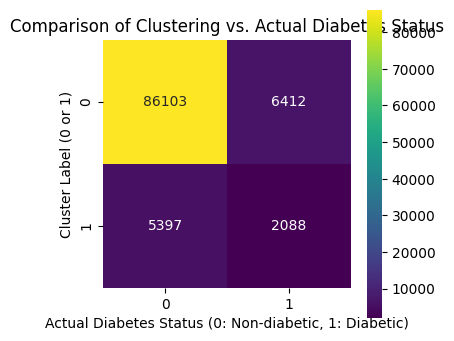

In [19]:
# Select only 'hypertension','HbA1c_level', 'blood_glucose_level' features
# Call the function with the desired features
selected_features = ['hypertension','HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.6710


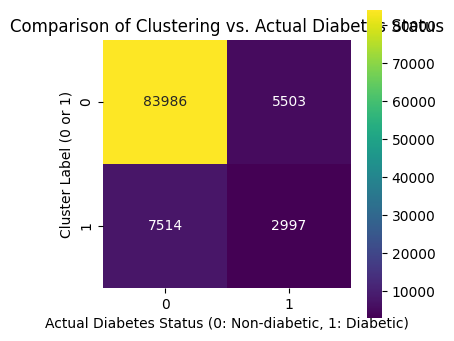

In [20]:
# Select only 'hypertension','heart_disease','HbA1c_level', 'blood_glucose_level' features
# Call the function with the desired features
selected_features = ['hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.5374


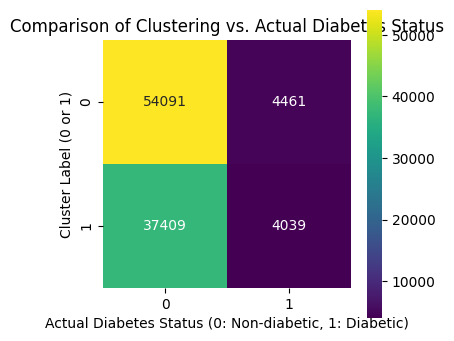

In [21]:
selected_features = ['gender', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.4613


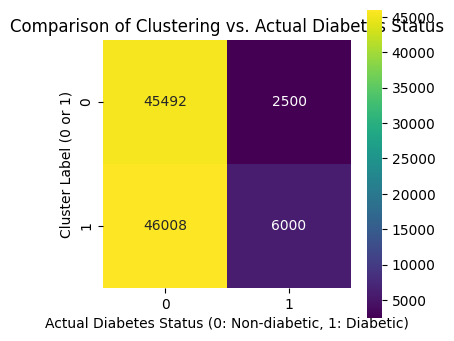

In [22]:
selected_features = ['smoking_history', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)

selected_features = ['gender','heart_disease', 'HbA1c_level', 'blood_glucose_level']
plot_comparison_matrix(df, selected_features)

# NMF with selected features
NMF (Non-negative Matrix Factorization) with selected features to explore unsupervised clustering patterns.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score after PCA: 0.5128


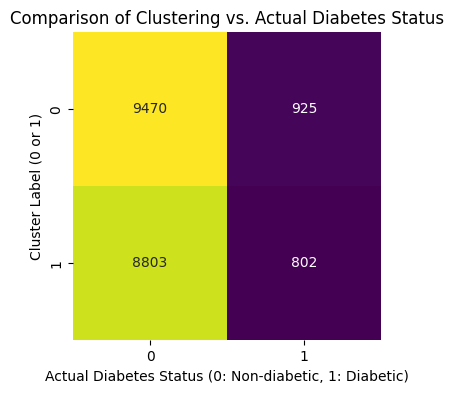

In [23]:
# Select numerical features
X = df[['heart_disease', 'HbA1c_level', 'blood_glucose_level']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)

# Apply NMF to the training data
nmf = NMF(n_components=2, init='random', random_state=42)
W_train = nmf.fit_transform(X_train)  # Basis matrix for training data

# Clustering on the basis matrix obtained from NMF
kmeans = KMeans(n_clusters=2, random_state=42)
labels_train = kmeans.fit_predict(W_train)

# Predicting cluster labels for the test basis matrix
W_test = nmf.transform(X_test)  # Transform test data to the same basis as training data
labels_test = kmeans.predict(W_test)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(W_test, labels_test)
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# Actual diabetes status
diabetes_status = df['diabetes'].values

# Create a confusion matrix-like 2x2 matrix to compare clustering results with actual diabetes status
comparison_matrix = np.zeros((2, 2))

for i in range(len(labels_test)):
    comparison_matrix[labels_test[i], diabetes_status[i]] += 1

# Plot the 2x2 heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(comparison_matrix, annot=True, fmt=".0f", cmap='viridis', cbar=False, square=True)
plt.title('Comparison of Clustering vs. Actual Diabetes Status')
plt.xlabel('Actual Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Cluster Label (0 or 1)')
plt.show()


# LogisticRegression
 for supervised learning approaches, focusing on the same selected features for a consistent comparison across models.

Accuracy Score: 0.9553


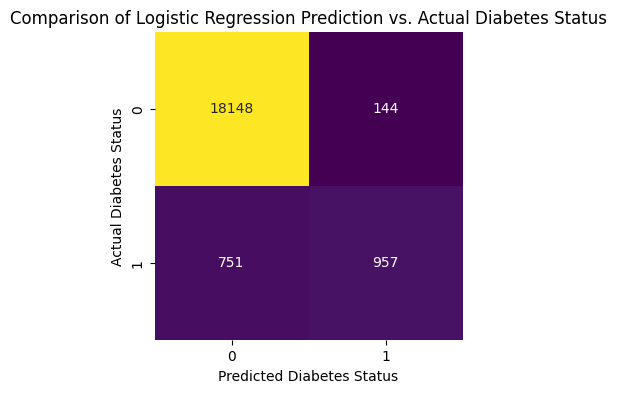

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def plot_logistic_regression_comparison_matrix(df, selected_features):
    """
    Trains a logistic regression model on selected features, predicts diabetes status, 
    plots a comparison matrix with the actual diabetes status, and calculates the accuracy score.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - selected_features: List of features to be selected for the analysis.
    """
    # Prepare the feature matrix X and target vector y
    X = df[selected_features]
    X = np.nan_to_num(X)
    y = df['diabetes']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict diabetes status on the test set
    y_pred = model.predict(X_test)
    
    # Generate the comparison matrix
    comparison_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score: {accuracy:.4f}')
    
    # Plot the comparison matrix as a heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(comparison_matrix, annot=True, fmt="d", cmap='viridis', cbar=False, square=True)
    plt.title('Comparison of Logistic Regression Prediction vs. Actual Diabetes Status')
    plt.xlabel('Predicted Diabetes Status')
    plt.ylabel('Actual Diabetes Status')
    plt.show()

selected_features = ['gender', 'smoking_history', 'hypertension', 'HbA1c_level', 'blood_glucose_level']
plot_logistic_regression_comparison_matrix(df, selected_features)



# Random Forest classifier
 for supervised learning approaches, focusing on the same selected features for a consistent comparison across models.

Accuracy Score: 0.9715


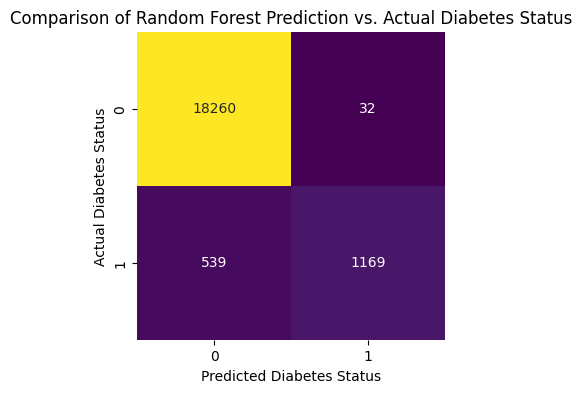

In [25]:
from sklearn.ensemble import RandomForestClassifier

def plot_random_forest_comparison_matrix(df, selected_features):
    """
    Trains a Random Forest classifier on selected features, predicts diabetes status,
    plots a comparison matrix with the actual diabetes status, and calculates the accuracy score.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - selected_features: List of features to be selected for the analysis.
    """
    # Prepare the feature matrix X and target vector y
    X = df[selected_features]
    X = np.nan_to_num(X)
    y = df['diabetes']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest Classifier model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict diabetes status on the test set
    y_pred = model.predict(X_test)
    
    # Generate the comparison matrix
    comparison_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score: {accuracy:.4f}')
    
    # Plot the comparison matrix as a heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(comparison_matrix, annot=True, fmt="d", cmap='viridis', cbar=False, square=True)
    plt.title('Comparison of Random Forest Prediction vs. Actual Diabetes Status')
    plt.xlabel('Predicted Diabetes Status')
    plt.ylabel('Actual Diabetes Status')
    plt.show()

selected_features = ['gender', 'smoking_history', 'hypertension', 'HbA1c_level', 'blood_glucose_level']
plot_random_forest_comparison_matrix(df, selected_features)


# Results:
The generation of comparison charts facilitated a visual correlation between model predictions and actual diabetes status, yielding notable insights:

NMF offered a silhouette score of 0.5128, indicating a moderate ability to discern clusters within the data.
KMeans Clustering with features 'heart_disease', 'HbA1c_level', and 'blood_glucose_level' achieved a silhouette score of 0.7865, suggesting a strong distinction between clusters.
An alternative KMeans Clustering utilizing 'hypertension', 'HbA1c_level', and 'blood_glucose_level' attained a silhouette score of 0.7225, further demonstrating the method's clustering efficacy.
Logistic Regression reported an accuracy score of 0.9553, showcasing a high degree of predictive precision.
The Random Forest Classifier outperformed other models with an accuracy score of 0.9715, confirming its superior predictive capability as evidenced by the comparison charts.


# Discussion/Conclusion:
The investigation underscored the value of both unsupervised and supervised learning models in predicting diabetes. KMeans Clustering provided significant insights into the dataset's intrinsic groupings, while supervised models, especially the Random Forest Classifier, delivered the most accurate diabetes status predictions. The analysis confirmed that selected features like 'heart_disease', 'HbA1c_level', and 'blood_glucose_level' are critical indicators for diabetes, with the Random Forest Classifier utilizing these features to achieve the highest prediction accuracy.

Future endeavors might explore the inclusion of more variables, the application of advanced modeling techniques, or the adoption of ensemble strategies to enhance predictive performance further. Combining unsupervised learning for initial data exploration with powerful supervised learning models for prediction represents a promising approach for early diabetes detection, offering a pathway to improved health interventions and outcomes.